In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('rock_density_xray.csv')

In [60]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [61]:
# renaming the columns

df.columns = ['Signal', 'Density']

In [62]:
df.head()

# renamed...

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<AxesSubplot: xlabel='Signal', ylabel='Density'>

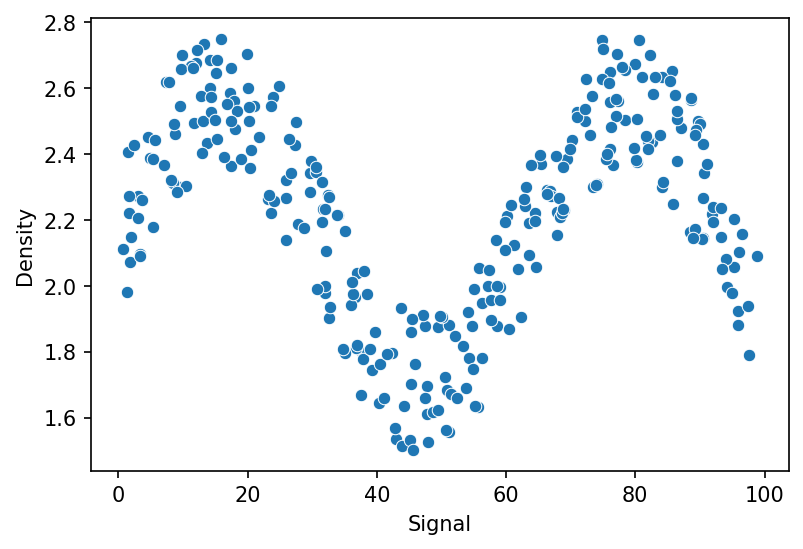

In [63]:
fig, ax = plt.subplots(dpi=150)
sns.scatterplot(x='Signal', y='Density',data=df, ax=ax)

In [64]:
X = df['Signal']
y = df['Density']

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lr_model = LinearRegression()

In [70]:
# lr_model.fit(X_train, y_train)
# when X = df['Signal']

# this will give the error saying...
# Reshape your data either using array.reshape(-1,1) if your data has a single feature or array.reshape(1, -1), if it contains a single sample!

In [71]:
X = df['Signal'].values.reshape(-1, 1)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [73]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [74]:
lr_preds = lr_model.predict(X_test)

In [75]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [77]:
mean_absolute_error(y_test, lr_preds)

0.211198973318633

In [78]:
np.sqrt(mean_squared_error(y_test, lr_preds))

0.2570051996584629

In [79]:
signal_range = np.arange(0, 100)

In [80]:
signal_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [81]:
signal_preds = lr_model.predict(signal_range.reshape(-1,1))

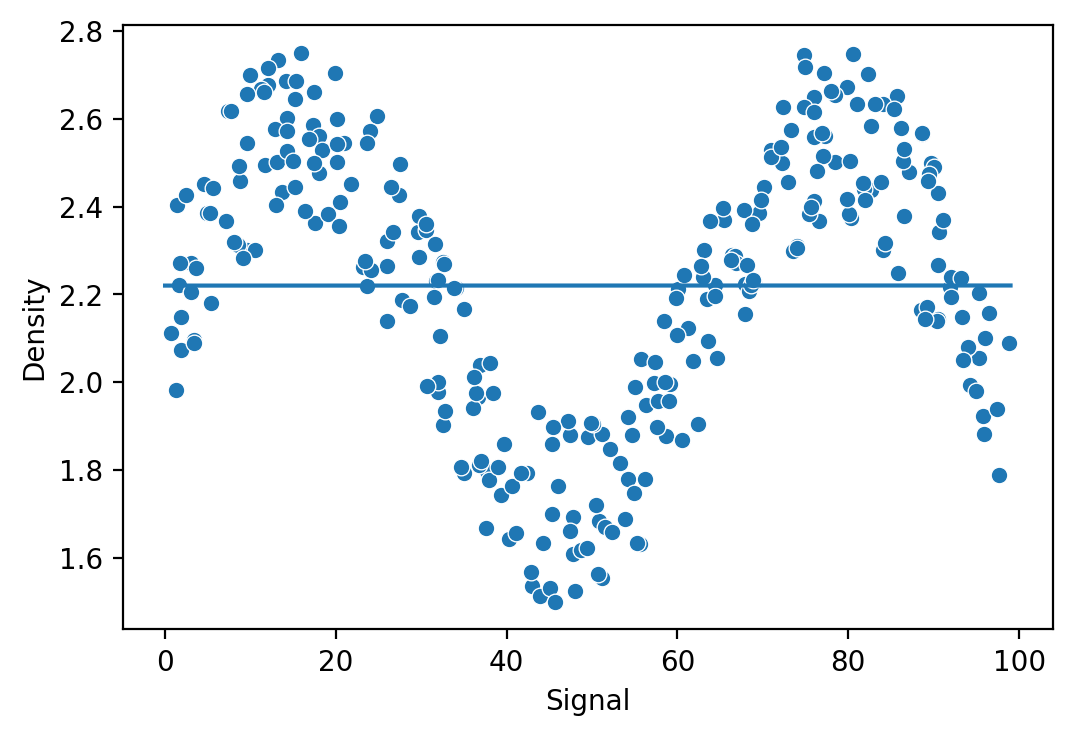

In [82]:
plt.figure(dpi=200)
sns.scatterplot(x='Signal', y='Density', data=df)

plt.plot(signal_range, signal_preds)


# hence the linear_regression model, cannot fit to this data!

In [122]:
def run_model(model, X_train, y_train, X_test, y_test):
    
    # Fit model to the training data
    model.fit(X_train, y_train)
    
    # Get Performance metrics
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    
    # Plot results of model for Signal Range
    signal_range = np.arange(0, 100)
    signal_preds = model.predict(signal_range.reshape(-1, 1))
    
    plt.figure(dpi=150)
    sns.scatterplot(x='Signal', y='Density', data=df, color='lightcoral')
    plt.plot(signal_range, signal_preds, color='black')

# Checking each and every Model, to see which model performs well on this given dataset!

### Using the LinearRegression...

MAE: 0.211198973318633
RMSE: 0.2570051996584629


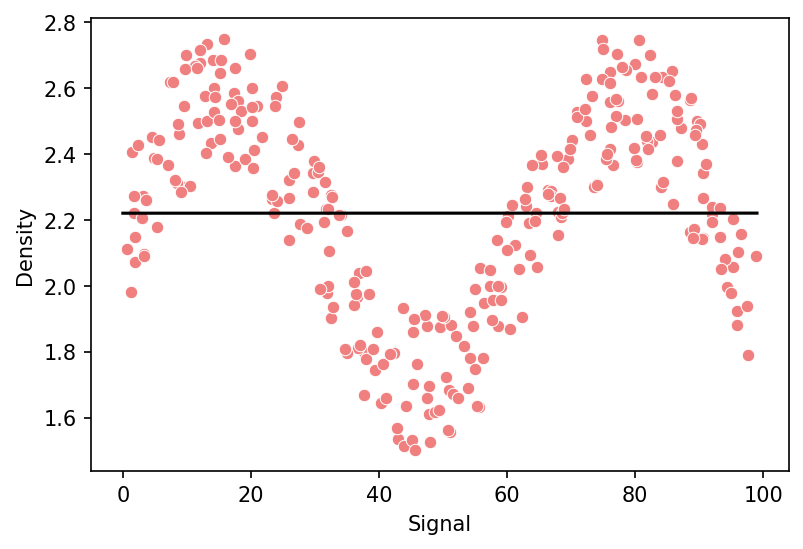

In [123]:
model = LinearRegression()
run_model(model, X_train, y_train, X_test, y_test)

### With Pipeline, Using the Polynomial Features...

In [124]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [125]:
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())

MAE: 0.1196919588183806
RMSE: 0.13807556099403992


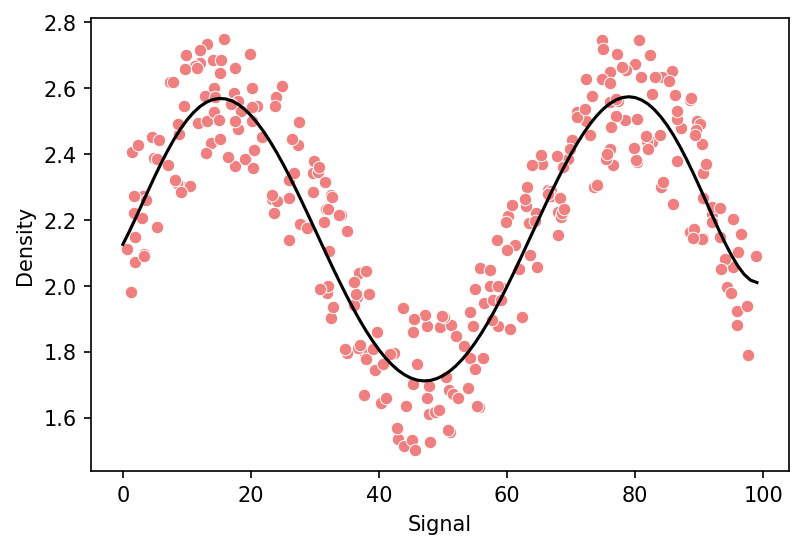

In [126]:
run_model(pipe, X_train, y_train, X_test, y_test)

### Using the K-Nearest-Neighbors....

In [127]:
from sklearn.neighbors import KNeighborsRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337
MAE: 0.12198383614100558
RMSE: 0.13730685016923647
MAE: 0.11635971693292672
RMSE: 0.13277855732740926
MAE: 0.13363165935705318
RMSE: 0.15954234753677107


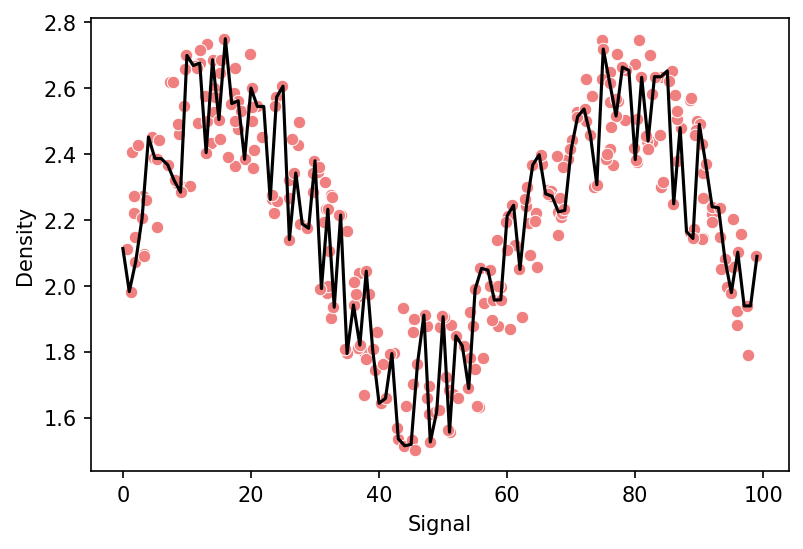

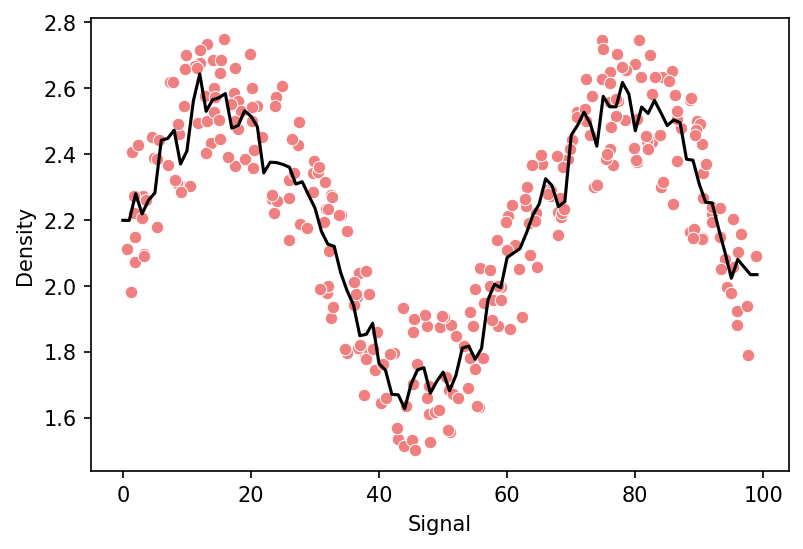

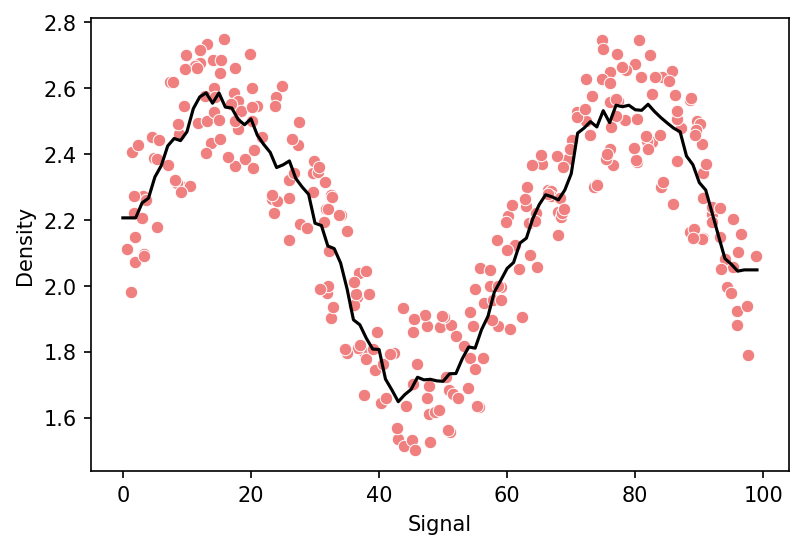

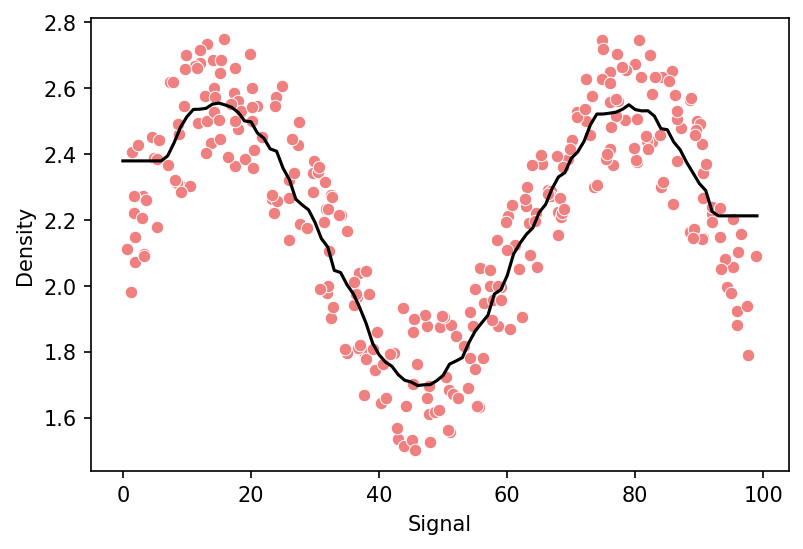

In [129]:
k_values = [1, 5, 10, 30]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors = n)
    run_model(model, X_train, y_train, X_test, y_test)
    
# as we increase the the value of k, we are basically adding more BIAS!

### Similarly for the DecisionTreeRegressor...

In [130]:
from sklearn.tree import DecisionTreeRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337


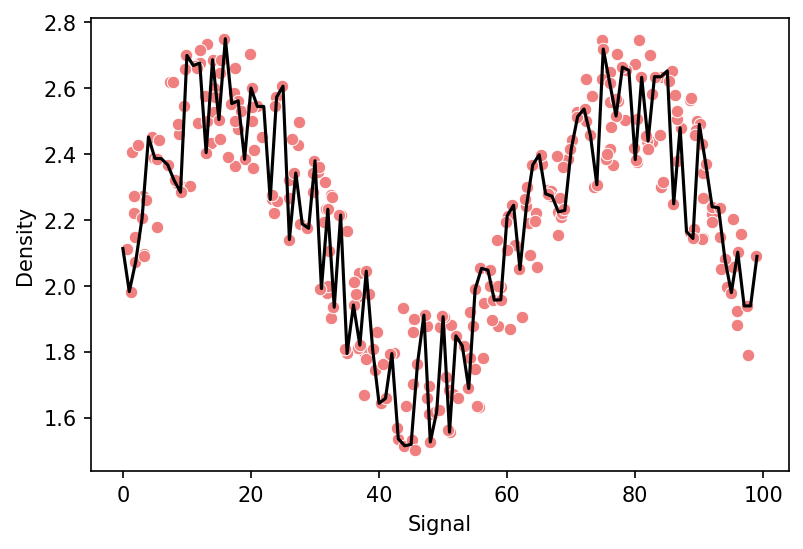

In [131]:
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

### Similarly Checking for the SupportVectorRegressor...
**When It comes to SupportVectorMachines, we have to choose the 'C' values and the 'Gamma' values, so for that we pretty much always have to run the Grid Search!**

In [132]:
from sklearn.svm import SVR

In [133]:
from sklearn.model_selection import GridSearchCV

In [135]:
svr = SVR()
param_grid = {'C':[0.01, 0.1, 1, 5, 10, 100, 1000],
             'gamma': ['auto', 'scale']}

grid = GridSearchCV(svr, param_grid)

MAE: 0.10854210121348368
RMSE: 0.12646999302046696


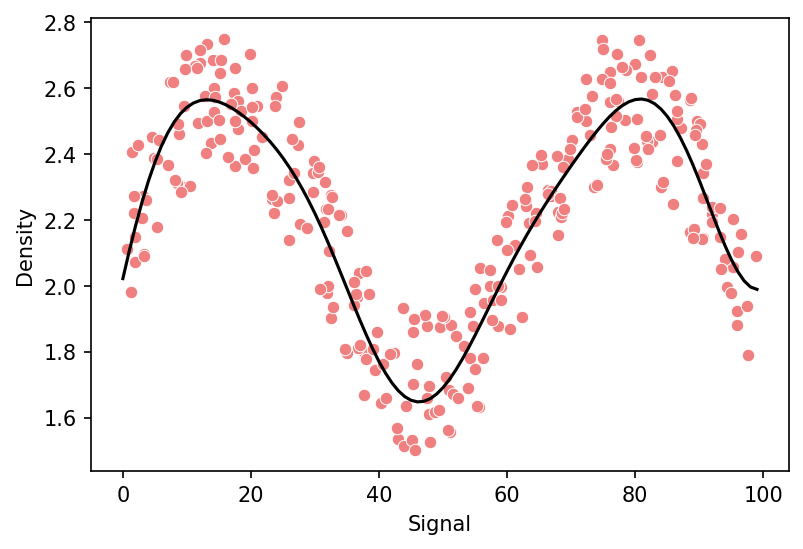

In [137]:
run_model(grid, X_train, y_train, X_test, y_test)

### Similarly let's explore the RandomForestRegressor...

In [138]:
from sklearn.ensemble import RandomForestRegressor

In [141]:
rfr = RandomForestRegressor(n_estimators=10)

MAE: 0.10955541332379162
RMSE: 0.1357313529774221


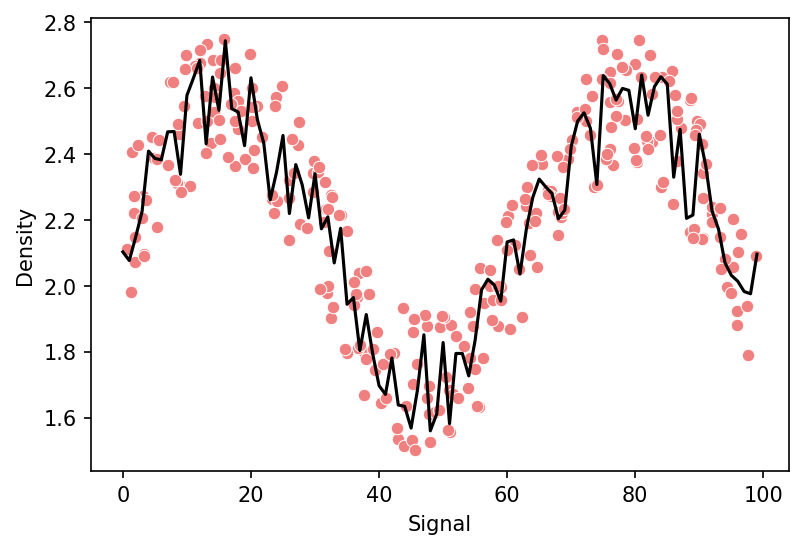

In [142]:
run_model(rfr, X_train, y_train, X_test, y_test)

### Using the Boosting Algorithms(GradientBoosting and AdaBoost)...

In [144]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

In [145]:
model = GradientBoostingRegressor()

MAE: 0.11318284854800689
RMSE: 0.13294148649584667


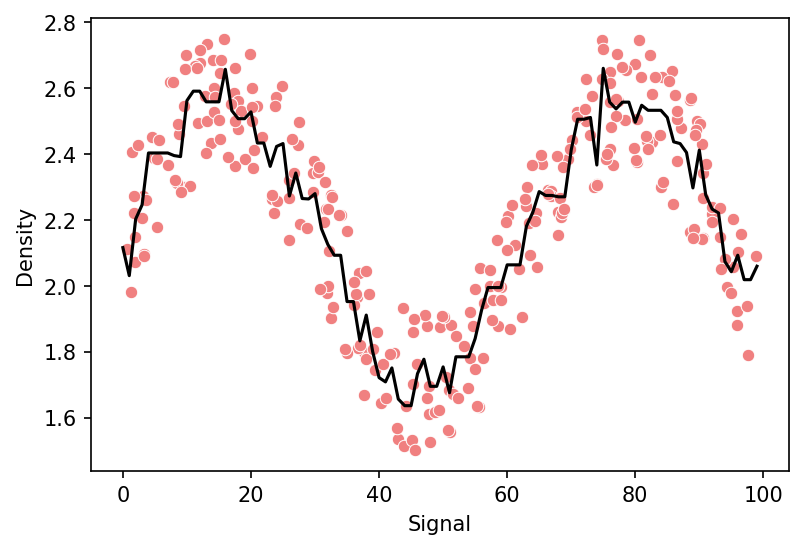

In [146]:
run_model(model, X_train, y_train, X_test, y_test)

# in this GradientBoostingRegressor, it's not actually picking up the more noise!

In [148]:
ada_boost_model = AdaBoostRegressor()

MAE: 0.11274721824333303
RMSE: 0.13156152812108654


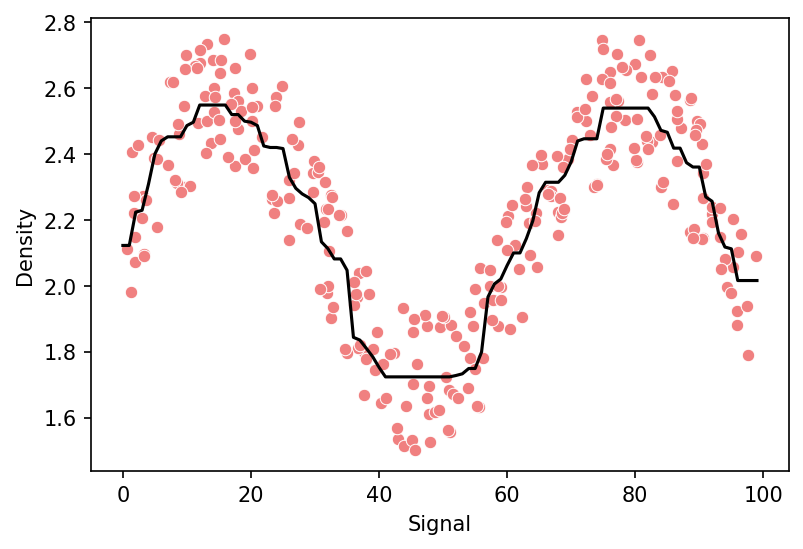

In [149]:
run_model(ada_boost_model, X_train, y_train, X_test, y_test)